In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv("/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv")
df.head()

/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


# Data preparation and summary

Clean data
* remove rows where `daily_vaccinations` are NaN

In [2]:
print( df.shape)
original_rows = df.shape[0]
# df[pd.isnull(df.daily_vaccinations)]
df = df.dropna(subset=['daily_vaccinations'])
deleted_rows =  original_rows - df.shape[0]
print( "deleted " + str(deleted_rows/original_rows*100)+"% data" )

(7744, 15)
deleted 2.414772727272727% data


## List of vaccines

In [3]:
def flat_unique_elements(array_of_array):
    vaccine_list = []
    for childArray in array_of_array:
        for child in childArray.split(","):
            if child.strip() not in vaccine_list:
                vaccine_list.append(child.strip())
    return vaccine_list

vaccines = flat_unique_elements(df['vaccines'].unique())

print("list of all vaccines  -\n", vaccines)

list of all vaccines  -
 ['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V', 'Sinopharm/Beijing', 'Moderna', 'Sinovac', 'Sinopharm/Wuhan', 'Covaxin', 'EpiVacCorona', 'Johnson&Johnson']


## List of vaccines and countries who have started its vaccination

     vaccine    country
     
     vaccine 1  country 1, 3
     vaccine 2  country 1, 4

In [4]:
vaccine_country_list = pd.DataFrame(columns = ['vaccines','country'])
df_vaccine_country = df[["country", "vaccines"]].drop_duplicates()
# for vaccine in vaccines:
for vaccine in vaccines:
    c = df_vaccine_country[df_vaccine_country.vaccines.str.contains(vaccine)]
    d = df_vaccine_country[df_vaccine_country.vaccines.map(lambda p : vaccine in p)]
    a = flat_unique_elements(c.country)
    s = ",".join(x for x in a)
    vaccine_country_list = vaccine_country_list.append({'vaccines': vaccine, 'country': s}, ignore_index=True)

print(vaccine_country_list)

             vaccines                                            country
0  Oxford/AstraZeneca  Afghanistan,Angola,Anguilla,Antigua and Barbud...
1     Pfizer/BioNTech  Albania,Andorra,Australia,Austria,Bahrain,Belg...
2           Sputnik V  Algeria,Argentina,Bahrain,Belarus,Bolivia,Hung...
3   Sinopharm/Beijing  Argentina,Bahrain,Cambodia,China,Egypt,Hungary...
4             Moderna  Austria,Belgium,Bulgaria,Canada,Czechia,Denmar...
5             Sinovac  Azerbaijan,Brazil,Chile,China,Colombia,Dominic...
6     Sinopharm/Wuhan                         China,United Arab Emirates
7             Covaxin                                              India
8        EpiVacCorona                                             Russia
9     Johnson&Johnson                         South Africa,United States


## Find out which vaccines are used by a country

    country     vaccines

    country 1   vaccine 1, 2, 3
    country 1   vaccine 1, 2, 3

In [5]:
country_vaccines = df[['country','vaccines']].drop_duplicates()
all_country = df['country'].unique()

country_vaccine = pd.DataFrame(columns = ['country','vaccines'])

if(all_country.size==country_vaccines.shape[0]):
    country_vaccine = country_vaccines
else:
    for country in all_country:
        vacciness= country_vaccines[ country_vaccines.country == country ]
        a= ",".join( str(x) for x in flat_unique_elements(vacciness.vaccines) )
        country_vaccine = country_vaccine.append({'country': country , 'vaccines': str(a) }, ignore_index=True)

print(country_vaccine)

          country                             vaccines
1     Afghanistan                   Oxford/AstraZeneca
24        Albania                      Pfizer/BioNTech
96        Algeria                            Sputnik V
118       Andorra                      Pfizer/BioNTech
163        Angola                   Oxford/AstraZeneca
...           ...                                  ...
7558      Uruguay             Pfizer/BioNTech, Sinovac
7581    Venezuela                            Sputnik V
7597      Vietnam                   Oxford/AstraZeneca
7613        Wales  Oxford/AstraZeneca, Pfizer/BioNTech
7712     Zimbabwe                    Sinopharm/Beijing

[146 rows x 2 columns]


# Task 1

##  What vaccines are used and in which countries?

In [6]:
vaccine_country_list

,vaccines,country
0,Oxford/AstraZeneca,"Afghanistan,Angola,Anguilla,Antigua and Barbud..."
1,Pfizer/BioNTech,"Albania,Andorra,Australia,Austria,Bahrain,Belg..."
2,Sputnik V,"Algeria,Argentina,Bahrain,Belarus,Bolivia,Hung..."
3,Sinopharm/Beijing,"Argentina,Bahrain,Cambodia,China,Egypt,Hungary..."
4,Moderna,"Austria,Belgium,Bulgaria,Canada,Czechia,Denmar..."
5,Sinovac,"Azerbaijan,Brazil,Chile,China,Colombia,Dominic..."
6,Sinopharm/Wuhan,"China,United Arab Emirates"
7,Covaxin,India
8,EpiVacCorona,Russia
9,Johnson&Johnson,"South Africa,United States"



## Q2. What country is vaccinated more people?

In [7]:
most_vaccinated_country = df.loc[df.total_vaccinations.idxmax()]

In [8]:
most_vaccinated_country

country                                                                    United States
iso_code                                                                             USA
date                                                                          2021-03-22
total_vaccinations                                                          126509736.00
people_vaccinated                                                            82772416.00
people_fully_vaccinated                                                      44910946.00
daily_vaccinations_raw                                                        2028324.00
daily_vaccinations                                                            2489697.00
total_vaccinations_per_hundred                                                     37.83
people_vaccinated_per_hundred                                                      24.75
people_fully_vaccinated_per_hundred                                                13.43
daily_vaccinations_pe

# Visualization

## Plot indias vaccine progress

     country        date  total_vaccinations  people_vaccinated  \
3257   India  2021-01-16            191181.0           191181.0   
3258   India  2021-01-17            224301.0           224301.0   
3259   India  2021-01-18            454049.0           454049.0   
3260   India  2021-01-19            674835.0           674835.0   
3261   India  2021-01-20            806484.0           806484.0   

      people_fully_vaccinated                     vaccines  
3257                      NaN  Covaxin, Oxford/AstraZeneca  
3258                      NaN  Covaxin, Oxford/AstraZeneca  
3259                      NaN  Covaxin, Oxford/AstraZeneca  
3260                      NaN  Covaxin, Oxford/AstraZeneca  
3261                      NaN  Covaxin, Oxford/AstraZeneca  


<AxesSubplot:>

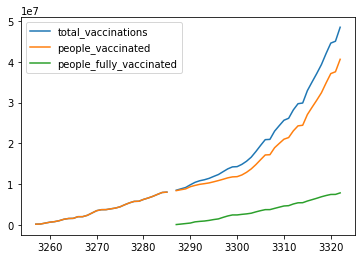

In [9]:

required_columns = ['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'vaccines']

indian_vaccine_data= df.loc[df['country']=="India",required_columns]
print(indian_vaccine_data.head())
# indian_vaccine_data.plot( indian_vaccine_data['date'], indian_vaccine_data['total_vaccinations'])
indian_vaccine_data.plot()

##  Number of days of vaccination campaingn

<AxesSubplot:>

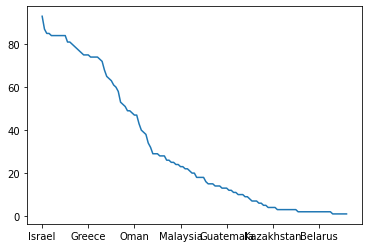

In [10]:
country_days_of_vaccination =df.country.where(df.people_vaccinated>0).value_counts()
country_days_of_vaccination.plot()